In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lib_FRIDA_data import *

In [2]:
expID='EMB_02June_nS10000'
path='/home/lennart/Arbeit/2_WorldTrans/work/FRIDA_plots/'

Temp, time_FRIDA = readFromFridaOutput('Temperature', expID=expID, path=path, lmedian=True)
Tsurf, time_FRIDA = readFromFridaOutput('EBM_Tsurf', expID=expID, path=path, lmedian=True)
Tthermo, time_FRIDA = readFromFridaOutput('EBM_Tthermo', expID=expID, path=path, lmedian=True)
Tdeep, time_FRIDA = readFromFridaOutput('EBM_Tdeep', expID=expID, path=path, lmedian=True)
Csurf, time_FRIDA = readFromFridaOutput('EBM_Csurf', expID=expID, path=path, lmedian=True)
Cthermo, time_FRIDA = readFromFridaOutput('EBM_Cthermo', expID=expID, path=path, lmedian=True)
Cdeep, time_FRIDA = readFromFridaOutput('EBM_Cdeep', expID=expID, path=path, lmedian=True)

Forcing_CO2, time_FRIDA = readFromFridaOutput('Forcing_CO2', expID=expID, path=path, lmedian=True)
Forcing_all, time_FRIDA = readFromFridaOutput('Forcing_all', expID=expID, path=path, lmedian=True)
Forcing_anthro, time_FRIDA = readFromFridaOutput('Forcing_anthro', expID=expID, path=path, lmedian=True)

Loading variable: EBM_Tsurf
Loading variable: EBM_Tthermo
Loading variable: EBM_Tdeep
Loading variable: EBM_Csurf
Loading variable: EBM_Cthermo
Loading variable: EBM_Cdeep
Loading variable: Forcing_CO2
Loading variable: Forcing_all
Loading variable: Forcing_anthro


In [11]:
Forcing_anthro_nonCO2 = Forcing_anthro - Forcing_CO2
Forcing_natural = Forcing_all - Forcing_anthro

mean_transfer_coefficient = 1.52

co2frac = Forcing_CO2/Forcing_all
nonco2frac = Forcing_anthro_nonCO2/Forcing_all
naturalfrac = Forcing_natural/Forcing_all

outgoing_LW = mean_transfer_coefficient*(Tsurf[1:] + Tsurf[:-1])*0.5

netForcing_anthro_nonCO2 = Forcing_anthro_nonCO2 - mean_transfer_coefficient*Tsurf*nonco2frac
netForcing_natural = Forcing_natural - mean_transfer_coefficient*Tsurf*naturalfrac
netForcing_CO2 = Forcing_CO2 - mean_transfer_coefficient*Tsurf*co2frac


time_FRIDA_flux = 0.5*(time_FRIDA[1:] + time_FRIDA[:-1])
flux_surf = (Tsurf[1:] - Tsurf[:-1]) * Csurf[0]
flux_thermo = (Tthermo[1:] - Tthermo[:-1]) * Cthermo[0]
flux_deep = (Tdeep[1:] - Tdeep[:-1]) * Cdeep[0]



anomaly_surf =  (Tsurf - Tsurf[0]) * Csurf[0]
anomaly_thermo =  (Tthermo - Tthermo[0]) * Cthermo[0]
anomaly_deep =  (Tdeep - Tdeep[0]) * Cdeep[0]

anomaly_surf *= 31557600 * 510072000000000 * 1.0e-21
anomaly_thermo *= 31557600 * 510072000000000 * 1.0e-21
anomaly_deep *= 31557600 * 510072000000000 * 1.0e-21


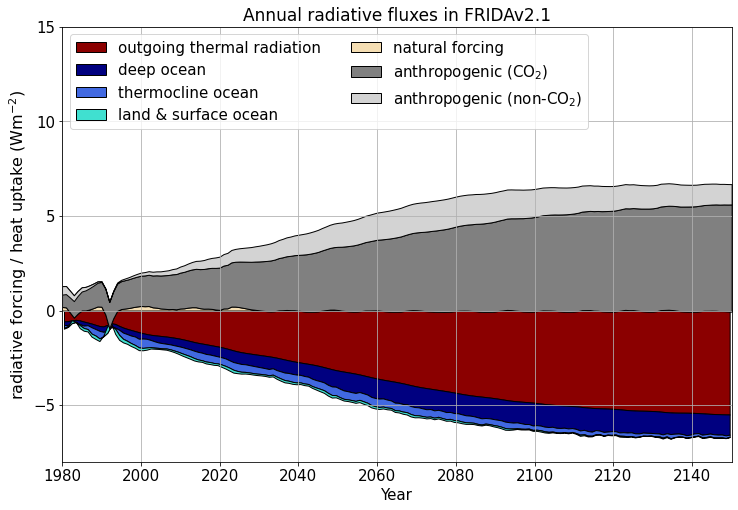

In [57]:
font=15
plt.figure(figsize=(12,8), facecolor='white')
plt.rcParams.update({'font.size': font})
plt.rc('xtick', labelsize=font)
plt.rc('ytick', labelsize=font)

ax=plt.gca()

ax.stackplot(time_FRIDA_flux, -outgoing_LW, -flux_deep, -flux_thermo, -flux_surf,
             labels=['outgoing thermal radiation', 'deep ocean', 'thermocline ocean', 'land & surface ocean'],
             colors=['darkred', 'navy', 'royalblue', 'turquoise'], edgecolor='k', alpha=1.0)


ax.stackplot(time_FRIDA, Forcing_natural, Forcing_CO2, Forcing_anthro_nonCO2,
             labels=['natural forcing', 'anthropogenic (CO$_2$)', 'anthropogenic (non-CO$_2$)'],
             colors=['wheat', 'grey', 'lightgrey'], alpha=1.0, edgecolor='k')




# Adding labels and legend
ax.set_xlabel('Year', fontsize=font)
ax.set_ylabel('radiative forcing / heat uptake (Wm$^{-2}$)', fontsize=font+1)
ax.set_title(r'Annual radiative fluxes in FRIDAv2.1', fontsize=font+2)

ax.set_xlim(1980,2150)
ax.set_ylim(-8.,15)

ax.grid()
ax.legend(ncol=2, loc='upper left')

# Show plot
plt.subplots_adjust(wspace=0.1)
plt.savefig('FRIDA_EMBv2.1_energy_balance.png')

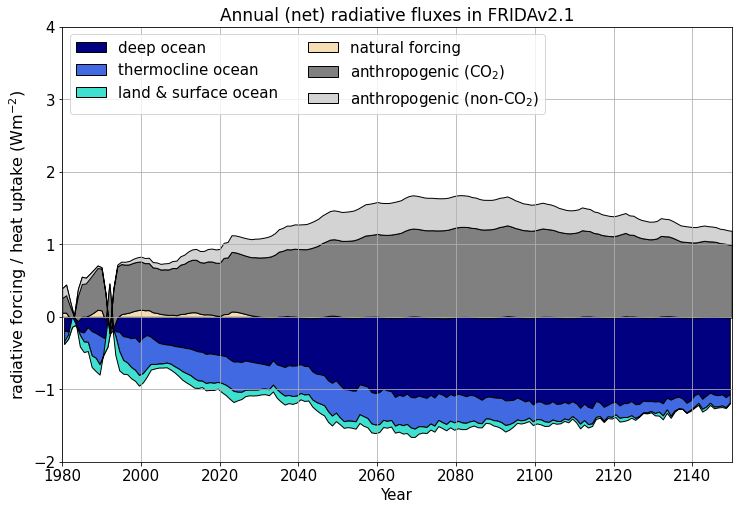

In [56]:
font=15
plt.figure(figsize=(12,8), facecolor='white')
plt.rcParams.update({'font.size': font})
plt.rc('xtick', labelsize=font)
plt.rc('ytick', labelsize=font)

ax=plt.gca()

ax.stackplot(time_FRIDA_flux, -flux_deep, -flux_thermo, -flux_surf,
             labels=['deep ocean', 'thermocline ocean', 'land & surface ocean'],
             colors=['navy', 'royalblue', 'turquoise'], edgecolor='k', alpha=1.0)


ax.stackplot(time_FRIDA, netForcing_natural, netForcing_CO2, netForcing_anthro_nonCO2,
             labels=['natural forcing', 'anthropogenic (CO$_2$)', 'anthropogenic (non-CO$_2$)'],
             colors=['wheat', 'grey', 'lightgrey'], alpha=1.0, edgecolor='k')




# Adding labels and legend
ax.set_xlabel('Year', fontsize=font)
ax.set_ylabel('radiative forcing / heat uptake (Wm$^{-2}$)', fontsize=font+1)
ax.set_title(r'Annual (net) radiative fluxes in FRIDAv2.1', fontsize=font+2)

ax.set_xlim(1980,2150)
ax.set_ylim(-2.,4)

ax.grid()
ax.legend(ncol=2, loc='upper left')

# Show plot
plt.subplots_adjust(wspace=0.1)
plt.savefig('FRIDA_EMBv2.1_net_energy_balance.png')

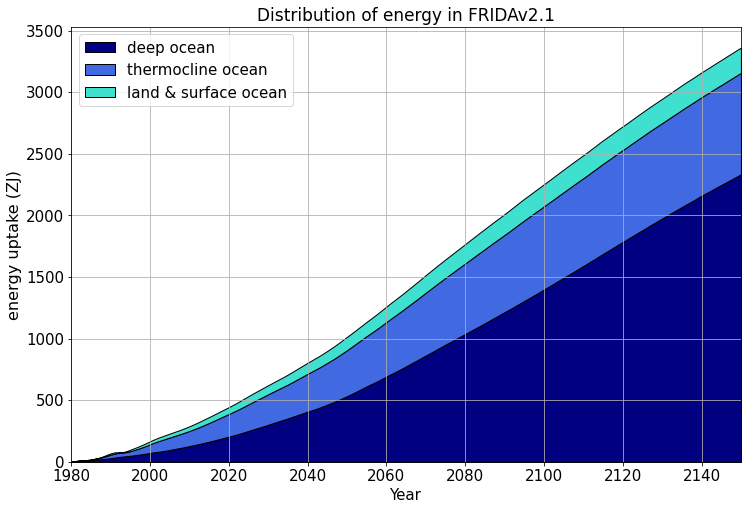

In [13]:
font=15
plt.figure(figsize=(12,8), facecolor='white')
plt.rcParams.update({'font.size': font})
plt.rc('xtick', labelsize=font)
plt.rc('ytick', labelsize=font)

ax=plt.gca()

ax.stackplot(time_FRIDA, anomaly_deep, anomaly_thermo, anomaly_surf,
             labels=['deep ocean', 'thermocline ocean', 'land & surface ocean'],
             colors=['navy', 'royalblue', 'turquoise'], edgecolor='k', alpha=1.0)


# Adding labels and legend
ax.set_xlabel('Year', fontsize=font)
ax.set_ylabel('energy uptake (ZJ)', fontsize=font+1)
ax.set_title(r'Distribution of energy in FRIDAv2.1', fontsize=font+2)

ax.set_xlim(1980,2150)
#ax.set_ylim(-2.,4)

ax.grid()
ax.legend(loc='upper left')

# Show plot
plt.subplots_adjust(wspace=0.1)
plt.savefig('FRIDA_EMBv2.1_energy_uptake.png')

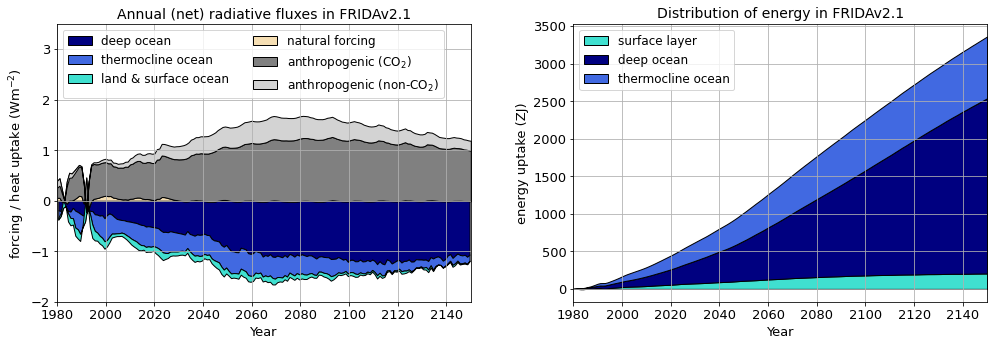

In [34]:
font=13
plt.figure(figsize=(14,5), facecolor='white')
plt.rcParams.update({'font.size': font})
plt.rc('xtick', labelsize=font)
plt.rc('ytick', labelsize=font)

plt.subplot(121)
ax=plt.gca()

ax.stackplot(time_FRIDA_flux, -flux_deep, -flux_thermo, -flux_surf,
             labels=['deep ocean', 'thermocline ocean', 'land & surface ocean'],
             colors=['navy', 'royalblue', 'turquoise'], edgecolor='k', alpha=1.0)


ax.stackplot(time_FRIDA, netForcing_natural, netForcing_CO2, netForcing_anthro_nonCO2,
             labels=['natural forcing', 'anthropogenic (CO$_2$)', 'anthropogenic (non-CO$_2$)'],
             colors=['wheat', 'grey', 'lightgrey'], alpha=1.0, edgecolor='k')


# Adding labels and legend
ax.set_xlabel('Year', fontsize=font)
ax.set_ylabel('forcing / heat uptake (Wm$^{-2}$)', fontsize=font)
ax.set_title(r'Annual (net) radiative fluxes in FRIDAv2.1', fontsize=font+1)

ax.set_xlim(1980,2150)
ax.set_ylim(-2.,3.5)

ax.grid()
ax.legend(ncol=2, loc='upper left', fontsize=font-1)



plt.subplot(122)
ax=plt.gca()
ax.stackplot(time_FRIDA, anomaly_surf, anomaly_deep, anomaly_thermo,
             labels=['surface layer', 'deep ocean', 'thermocline ocean'],
             colors=['turquoise', 'navy', 'royalblue'], edgecolor='k', alpha=1.0)


# Adding labels and legend
ax.set_xlabel('Year', fontsize=font)
ax.set_ylabel('energy uptake (ZJ)', fontsize=font)
ax.set_title(r'Distribution of energy in FRIDAv2.1', fontsize=font+1)

ax.set_xlim(1980,2150)
#ax.set_ylim(-2.,4)

ax.grid()
ax.legend(loc='upper left', fontsize=font-1)


# Show plot
plt.tight_layout()
plt.savefig('FRIDA_EMBv2.1_net_energy_balance+uptake.png')

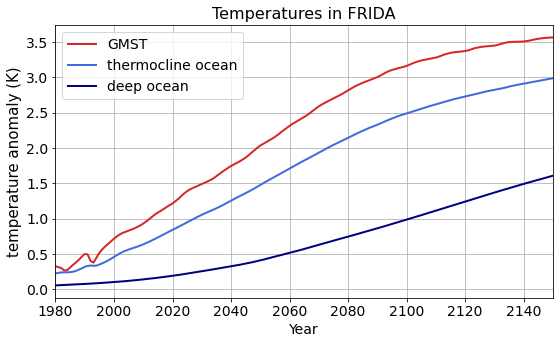

In [20]:
font=14
plt.figure(figsize=(8,5), facecolor='white')
plt.rcParams.update({'font.size': font})
plt.rc('xtick', labelsize=font)
plt.rc('ytick', labelsize=font)

ax=plt.gca()

ax.plot(time_FRIDA, Temp, label='GMST', color='tab:red', linewidth=2)
ax.plot(time_FRIDA, Tthermo, label='thermocline ocean', color='royalblue', linewidth=2)
ax.plot(time_FRIDA, Tdeep, label='deep ocean', color='navy', linewidth=2)


# Adding labels and legend
ax.set_xlabel('Year', fontsize=font)
ax.set_ylabel('temperature anomaly (K)', fontsize=font+1)
ax.set_title(r'Temperatures in FRIDA', fontsize=font+2)

ax.set_xlim(1980,2150)
#ax.set_ylim(-2.,4)

ax.grid()
ax.legend(loc='upper left')


# Show plot
plt.tight_layout()
plt.savefig('FRIDA_EMBv2.1_Temperature.png')